In [2]:
import scipy as sci
from scipy.special import factorial, assoc_laguerre, sph_harm
from scipy import constants
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from skimage import measure
import seaborn as sns
import matplotlib.animation as animation
from IPython import display
import math

$$\Psi_{n,l,m}(r, \theta, \varphi) = \sqrt{\left(\frac{2}{n}\right)^3\frac{(n-l-1)!}{2n(n+l)!}}e^{-\frac{r}{n}} \left(\frac{2r}{n}\right)^l L_{n-l-1}^{2l+1}\left(\frac{2r}{n}\right) Y^m_l\left(\theta, \varphi \right)$$

In [3]:
def Psi(n, l, m, x, y, z):
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    
    cz1 = np.sqrt((2.0/n)**3 * factorial(n-l-1)/(2.0*n*factorial(n+l)))
    cz1 = cz1 * np.exp(-r/n) * (2.0*r/n)**l * assoc_laguerre(2.0*r/n, n-l-1, 2*l+1)
    
    cz2 = cz1 *  sph_harm(m, l, phi, theta)
    
    return cz2

In [8]:
# Liczby kwantowe dla wodoru
n = 4
l = 2
m = 0


u_lim = 70
b_lim = -70

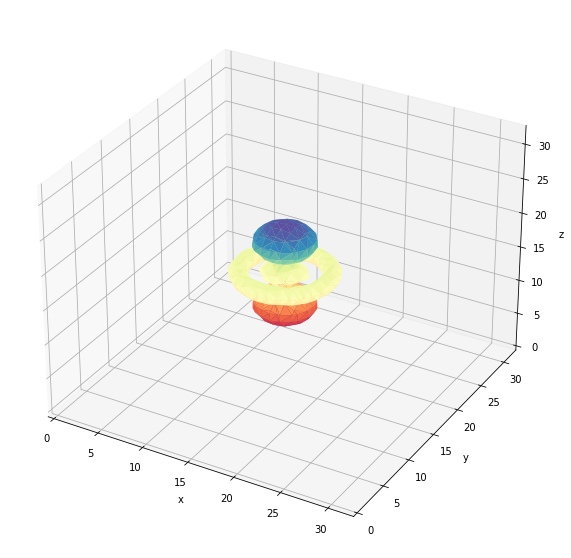

In [9]:
step = 4.4

xs = np.arange(b_lim, u_lim, step)
ys = np.arange(b_lim, u_lim, step)
zs = np.arange(b_lim, u_lim, step)
x, y, z = np.meshgrid(xs, ys, zs)


prob = np.abs(Psi(n, l, m, x, y, z))**2

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

verts, faces, normals, values = measure.marching_cubes(prob, 10**(-5))
ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='Spectral')

plt.show()

In [11]:
# Dokładność rysunków
step = 1.5

xs = np.arange(b_lim, u_lim, step)
ys = np.arange(b_lim, u_lim, step)
zs = np.arange(b_lim, u_lim, step)
x, y, z = np.meshgrid(xs, ys, zs)


prob = np.abs(Psi(n, l, m, x, y, z))**2

fig = plt.figure(figsize = (10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([0,len(x)])
ax.set_ylim([0,len(y)])
ax.set_zlim([0,len(z)])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')


init_power = np.log10(prob.max())-0.0000000000000001

di = 0.5

def init():
    verts, faces, normals, values = measure.marching_cubes(prob, 10**(init_power))
    ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='Spectral')

def animate(i):
    verts, faces, normals, values = measure.marching_cubes(prob, 10**(init_power-di*i))
    ax.plot_trisurf(verts[:, 0], verts[:, 1], faces, verts[:, 2], cmap='Spectral')
    plt.title(f'Dolna granica prawdopodobieństwa: {10**(init_power-di*i)}\nLiczby kwantowe wodoru n={n}, l={l}, m={m}', fontsize=20)
    return ax

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=15, interval = 300, repeat = True)

video = anim.to_html5_video()
  
html = display.HTML(video)
  
display.display(html)
plt.close()

In [12]:
# Dokładność rysunków
step = 0.7

xs = np.arange(b_lim, u_lim, step)
ys = np.arange(b_lim, u_lim, step)
zs = np.arange(b_lim, u_lim, step)
x, y, z = np.meshgrid(xs, ys, zs)


prob = np.abs(Psi(n, l, m, x, y, z))**2

prob = np.swapaxes(prob, 0, 2)


fig, ax = plt.subplots(figsize = (10,8))
ax.set_title(f'') 

 
def init():
    sns.heatmap(prob[:, 0, :], xticklabels=20, yticklabels=20)

def animate(i):
    plt.clf()
    sns.heatmap(prob[:, i, :], xticklabels=20, yticklabels=20)
    plt.title(f'Liczby kwantowe wodoru n={n}, l={l}, m={m}\nNumer płaszczyzny: {i}', fontsize=20)
    

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(x), interval = 50, repeat = True)

video = anim.to_html5_video()
  
html = display.HTML(video)
  
display.display(html)
plt.close()

